<a href="https://colab.research.google.com/github/lokeshsharma123456/SMAI_project_stock_prediction/blob/main/Stock_pred_tickerwise_modelwise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOOGLE

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [2]:
import os

# Change directory to /content/sample_data
os.chdir('/content/drive/MyDrive/ML_PROJECT')

# Print the current working directory to verify the change
print(os.getcwd())

/content/drive/MyDrive/ML_PROJECT


In [ ]:
pip install matplotlib


In [ ]:
pip install tensorflow


In [ ]:
pip install seaborn


In [10]:
'''
Text encoding via Google USE and PCA
'''
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import csv
import pandas as pd
import glob

from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re    #module for regular expression operations
import seaborn as sns 


In [11]:
# Define the URL of the Universal Sentence Encoder module
module_url = "https://tfhub.dev/google/universal-sentence-encoder/1"
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]


In [12]:
# Import the Universal Sentence Encoder's TF Hub module
embed = tf.keras.Sequential([
    hub.KerasLayer(module_url, input_shape=[], dtype=tf.string)
])



In [13]:
embed = hub.load(module_url) #Load the module from selected URL


In [14]:
import tensorflow.compat.v1 as tf

# cleaning the text

In [3]:
'''Clean data'''
import string
from nltk.corpus import stopwords

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Replace punctuation with space
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join the cleaned words back into a string
    cleaned_text = ' '.join(words)

    return cleaned_text

# PCA EMBEDDING

In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
def get_vectors(messages):
    # Encode the messages using the Universal Sentence Encoder
    embeddings = embed(messages)
    # Reduce the embeddings to a NumPy array
    embeddings = np.array(embeddings)
    return embeddings


In [16]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

In [7]:
def embed_text(text):
    embeddings = model([text])
    return np.array(embeddings).tolist()[0]

In [20]:
'''Text encoding via Google USE and PCA
'''
def main(folder,target_folder):
    # Loop through all CSV files in the specified folder
    ticker_symbol = ['TSLA','GOOG','INTU','ALGN','AMZN','AAL','MSFT','AMAT','FOX','SBUX','WDC','NFLX','COST','ADBE','EBAY','WDAY','LRCX','BIDU','PYPL']

    for ticker in  ticker_symbol:
        print(ticker)
        #open each ticker
        df = pd.read_csv(f'{folder}/{ticker}.csv')
        #concat headline summary
        df['headline_summary'] = df['headline'] + ' ' + df['summary'] 
        #apply google embeddings
        df['embedding'] = df['headline_summary'].apply(embed_text)

        # Expand the embeddings into separate columns
        embeddings_df = pd.DataFrame(df['embedding'].to_list())
        embeddings_df.columns = [f"embedding_{i+1}" for i in range(embeddings_df.shape[1])]


        # Concatenate the original dataframe and the embeddings dataframe
        df = pd.concat([df, embeddings_df], axis=1)
        #dropping useless tables
        df.drop(['datetime','headline','headline_summary',
                 'related', 'summary','Open', 'Close', 
                 'embedding'], axis=1, inplace=True)

        # print(df)
        result_counts = df['result'].value_counts()
        # print(result_counts[0])
        # print(result_counts[1])
        df.to_csv(f'{target_folder}/{ticker}.csv', header=True, index=False)
        # Add columns for the encoded headline and snippet vectors
        

         

if __name__ == '__main__':
    main("complete_year_wise_data","Embedded") # Input Google or NYtimes raw news folder


TSLA
GOOG
INTU
ALGN
AMZN
AAL
MSFT
AMAT
FOX
SBUX
WDC
NFLX
COST
ADBE
EBAY
WDAY
LRCX
BIDU
PYPL


# Predicting different tickers on same data

## Logistic regression


In [79]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
def evaluate_model(predictions, actual):
    accuracy = accuracy_score(actual, predictions)
    f1 = f1_score(actual, predictions)
    recall = recall_score(actual, predictions)
    precision = precision_score(actual, predictions)
    return accuracy, f1, recall, precision


In [80]:
import matplotlib.pyplot as plt
def bargraph(results):
  # Define a list of tickers for the x-axis
  tickers = [result[0] for result in results]

  # Define a list of values for each metric
  accuracy_values = [result[1] for result in results]
  f1_values = [result[2] for result in results]
  recall_values = [result[3] for result in results]
  precision_values = [result[4] for result in results]

  # Create a figure with four subplots
  fig, axs = plt.subplots(4, 1, figsize=(10, 10))

  # Add a bar chart for each metric to its own subplot
  axs[0].bar(tickers, accuracy_values)
  axs[0].set_title("Accuracy")
  plt.xticks(rotation=90)

  axs[1].bar(tickers, f1_values)
  axs[1].set_title("F1 Score")
  plt.xticks(rotation=90)

  axs[2].bar(tickers, recall_values)
  axs[2].set_title("Recall")
  plt.xticks(rotation=90)

  axs[3].bar(tickers, precision_values)
  axs[3].set_title("Precision")
  # Rotate the tick labels
  plt.xticks(rotation=90)
  # Adjust the spacing between subplots
  plt.subplots_adjust(hspace=0.5)

  # Show the plot
  plt.show()

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [105]:
def evaluate_file(file_path,model_name):
    df = pd.read_csv(file_path)
   
    # Split the dataframe into training and testing sets
    train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
    # Separate the features and labels into different dataframes for both training and testing sets
    X_train = train_data.drop(['result'], axis=1)
    y_train = train_data['result']
    X_test = test_data.drop(['result'], axis=1)
    y_test = test_data['result']

    # Create a logistic regression model
    # model = LogisticRegression()
    # # Train the model
    # model.fit(X_train, y_train)

    # # Make predictions on the test set
    # predictions = model.predict(X_test)
    # Create the machine learning model
    if model_name == 'logistic regression':
        model = LogisticRegression()
    elif model_name == 'svm':
        model = SVC(kernel='rbf')
    elif model_name == 'random forest':
        model = RandomForestClassifier()
    elif model_name == 'neural network':
        model = MLPClassifier()
    elif model_name == 'cnn':
        # Define the CNN model architecture using Keras
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    elif model_name == 'rnn':
        # Define the RNN model architecture using Keras
        model = Sequential()
        model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    if model_name in ['cnn', 'rnn']:
        # Reshape the input data for CNN and RNN models
        X_train = X_train.values.reshape(-1, 28, 28, 1)
        X_test = X_test.values.reshape(-1, 28, 28, 1)
        # One-hot encode the labels for CNN models
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)
        # Train the CNN or RNN model
        model.fit(X_train, y_train, epochs=10, batch_size=32)
    else:
        model.fit(X_train, y_train)

    # Make predictions on the test set
    if model_name in ['cnn', 'rnn']:
        predictions = np.argmax(model.predict(X_test), axis=-1)
    else:
        predictions = model.predict(X_test)
    # Evaluate the model
    accuracy, f1, recall, precision = evaluate_model(predictions, y_test)
    conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1])
    return conf_matrix, accuracy, f1, recall, precision


In [ ]:
# Iterate over the files and evaluate each one
results = []
folder = "Embedded/*.csv"
# Loop through all CSV files in the specified folder
for file_path in glob.glob(folder):
    conf_matrix, accuracy, f1, recall, precision = evaluate_file(file_path,'logistic regression')
    file_path=file_path.split("/")[-1].split(".")[0]
    results.append([file_path, accuracy, f1, recall, precision])
        
# Convert the results to a DataFrame and print it
print("LOGISTIC REGRESSION")
results_df = pd.DataFrame(results, columns=['TICKER', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(results_df)
bargraph(results)

# -----------SVM WITH RF

In [ ]:
# Iterate over the files and evaluate each one
results = []
folder = "Embedded/*.csv"
# Loop through all CSV files in the specified folder
for file_path in glob.glob(folder):
    conf_matrix, accuracy, f1, recall, precision = evaluate_file(file_path,'svm')
    file_path=file_path.split("/")[-1].split(".")[0]
    results.append([file_path, accuracy, f1, recall, precision])
        
# Convert the results to a DataFrame and print it
print("SVM WITH RF")
results_df = pd.DataFrame(results, columns=['TICKER', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(results_df)
bargraph(results)


#RANDOM FOREST

In [ ]:
# Iterate over the files and evaluate each one
results = []
folder = "Embedded/*.csv"
# Loop through all CSV files in the specified folder
for file_path in glob.glob(folder):
    conf_matrix, accuracy, f1, recall, precision = evaluate_file(file_path,'random forest')
    file_path=file_path.split("/")[-1].split(".")[0]
    results.append([file_path, accuracy, f1, recall, precision])
        
# Convert the results to a DataFrame and print it
print("Random forest")
results_df = pd.DataFrame(results, columns=['TICKER', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(results_df)
bargraph(results)

# ---------- NEURAL NETWORKS

In [ ]:
# Iterate over the files and evaluate each one
results = []
folder = "Embedded/*.csv"
# Loop through all CSV files in the specified folder
for file_path in glob.glob(folder):
    accuracy, f1, recall, precision = evaluate_file(file_path,'neural network')
    file_path=file_path.split("/")[-1].split(".")[0]
    results.append([file_path, accuracy, f1, recall, precision])


In [ ]:
# Convert the results to a DataFrame and print it
print("Neural network")
results_df = pd.DataFrame(results, columns=['TICKER', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(results_df)
bargraph(results)

# now AIM to merge all then apply all with pca

In [113]:
import warnings
# import plotly.graph_objects as go
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns


In [70]:
def pca(embeddings):
    # Perform PCA on the embeddings to reduce their dimensionality
    pca = PCA(n_components=25)
    principalComponents = pca.fit_transform(embeddings)
    return principalComponents

In [87]:
folder = "Embedded/*.csv"
# Loop through all CSV files in the specified folder
pca_vector = pd.DataFrame()
columns = [f"PC{i}" for i in range(1, 26)] + ["result"] 
pca_vector = pd.DataFrame(columns=columns)
for file_path in glob.glob(folder):
    df = pd.read_csv(f"{file_path}")
    result_column = df['result']
    df = df.drop('result', axis=1)
    embeddings_pca = pca(df)
    columns = [f"PC{i+1}" for i in range(25)]
    pca_df = pd.DataFrame(embeddings_pca, columns=columns)
    if result_column is not None:
      pca_df['result'] = result_column
    
    pca_vector = pca_vector.append(pca_df, ignore_index=True)

pca_vector.to_csv("all_embedded.csv")

        


In [118]:
# Iterate over the files and evaluate each one
results = []
file_path = "all_embedded.csv"
df = pd.read_csv(file_path)
conf_matrix1, accuracy, f1, recall, precision = evaluate_file(file_path,'logistic regression')
results.append(["LOGISTIC REGRESSION", accuracy, f1, recall, precision])
        
# Convert the results to a DataFrame and print it
print("LOGISTIC REGRESSION")
results_df = pd.DataFrame(results, columns=['MODEL', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(results_df)

LOGISTIC REGRESSION
                 MODEL  Accuracy  F1 Score    Recall  Precision
0  LOGISTIC REGRESSION  0.520586  0.417961  0.352801   0.512643


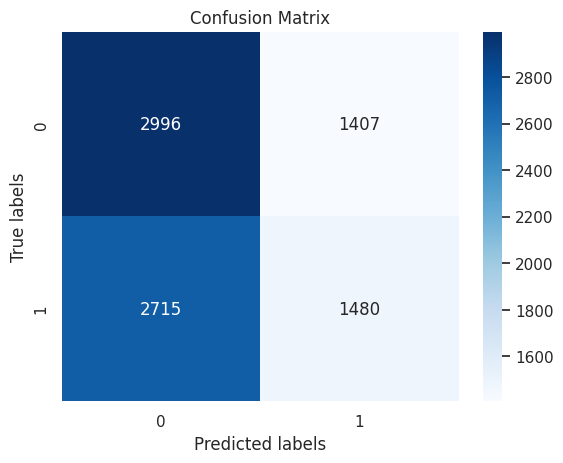

In [119]:
# plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')

# add axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()

In [120]:
conf_matrix2, accuracy, f1, recall, precision = evaluate_file(file_path,'svm')
results.append(["SVM WITH KERNEL", accuracy, f1, recall, precision])
        
# Convert the results to a DataFrame and print it
print("SVM WITH KERNEL")
results_df = pd.DataFrame(results, columns=['MODEL', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(results_df)

SVM WITH KERNEL
                 MODEL  Accuracy  F1 Score    Recall  Precision
0  LOGISTIC REGRESSION  0.520586  0.417961  0.352801   0.512643
1      SVM WITH KERNEL  0.517562  0.518123  0.531585   0.505325


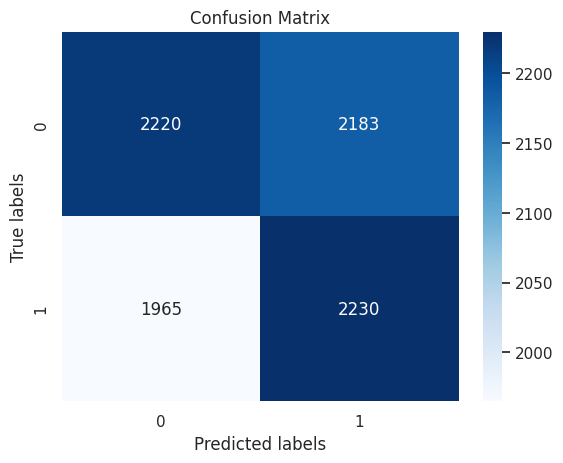

In [121]:
# plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix2, annot=True, cmap='Blues', fmt='g')

# add axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()

In [122]:
conf_matrix3, accuracy, f1, recall, precision = evaluate_file(file_path,'random forest')
results.append(["random forest", accuracy, f1, recall, precision])
        
# Convert the results to a DataFrame and print it
print("Random forest")
results_df = pd.DataFrame(results, columns=['MODEL', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(results_df)

Random forest
                 MODEL  Accuracy  F1 Score    Recall  Precision
0  LOGISTIC REGRESSION  0.520586  0.417961  0.352801   0.512643
1      SVM WITH KERNEL  0.517562  0.518123  0.531585   0.505325
2        random forest  0.648639  0.652319  0.675566   0.630619


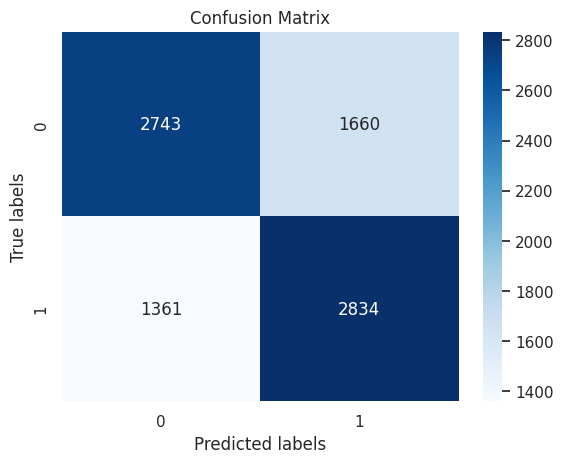

In [123]:
# plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix3, annot=True, cmap='Blues', fmt='g')

# add axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()

In [124]:
conf_matrix4, accuracy, f1, recall, precision = evaluate_file(file_path,'neural network')
results.append(["neural networkL", accuracy, f1, recall, precision])
        
# Convert the results to a DataFrame and print it
print("NEURAL NETWORK")
results_df = pd.DataFrame(results, columns=['MODEL', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(results_df)

NEURAL NETWORK
                 MODEL  Accuracy  F1 Score    Recall  Precision
0  LOGISTIC REGRESSION  0.520586  0.417961  0.352801   0.512643
1      SVM WITH KERNEL  0.517562  0.518123  0.531585   0.505325
2        random forest  0.648639  0.652319  0.675566   0.630619
3      neural networkL  0.513492  0.007592  0.003814   0.800000


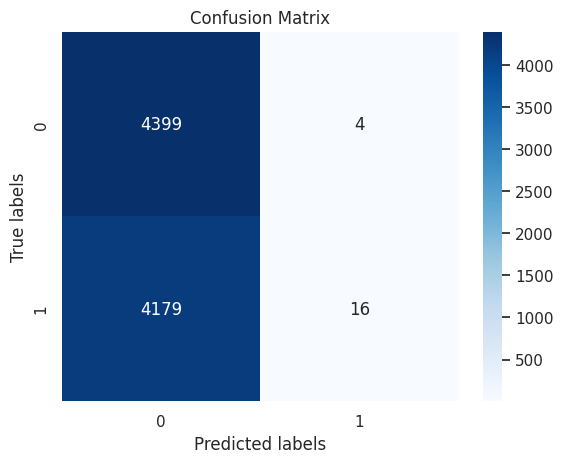

In [125]:
# plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix4, annot=True, cmap='Blues', fmt='g')

# add axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()

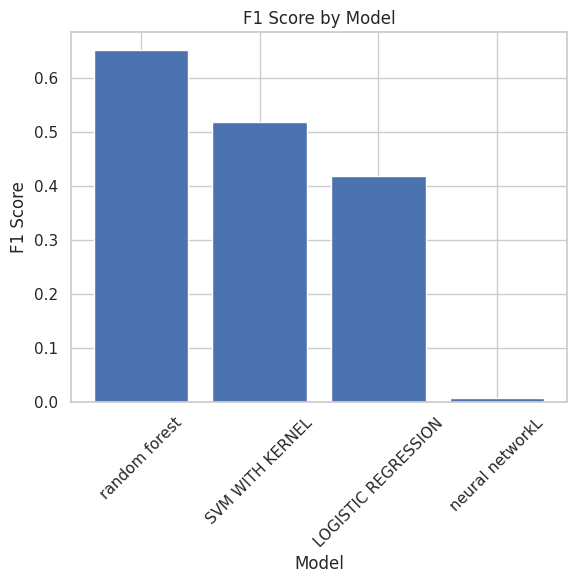

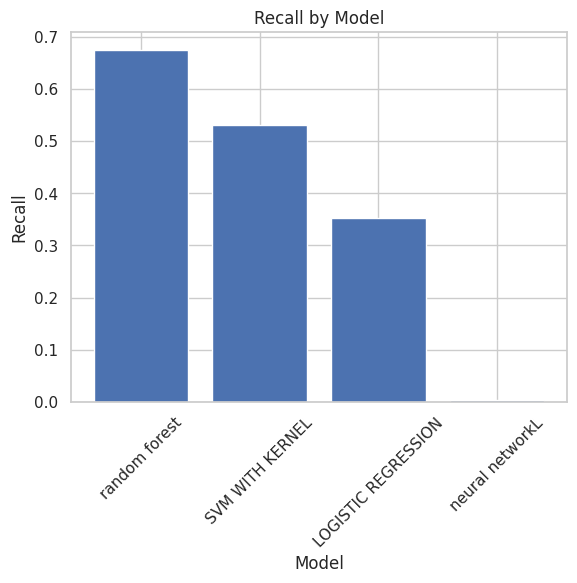

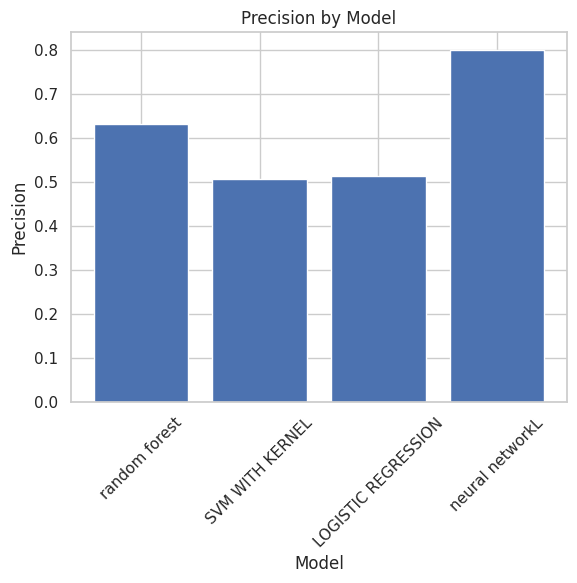

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['MODEL', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])

# Sort the DataFrame by F1 Score
results_df = results_df.sort_values('F1 Score', ascending=False)

# Create a bar graph for F1 Score
plt.bar(results_df['MODEL'], results_df['F1 Score'])
plt.title('F1 Score by Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

# Create a bar graph for Recall
plt.bar(results_df['MODEL'], results_df['Recall'])
plt.title('Recall by Model')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

# Create a bar graph for Precision
plt.bar(results_df['MODEL'], results_df['Precision'])
plt.title('Precision by Model')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()
